In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
DDP = pd.read_csv("geneVSorgans.csv")

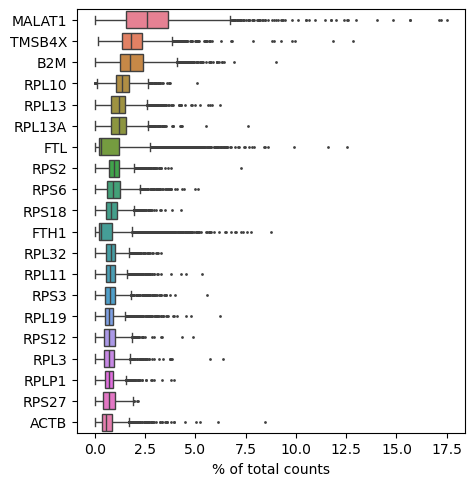

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [55]:
adata = sc.read_10x_mtx('data/filtered_gene_bc_matrices/hg19/',var_names='gene_symbols',cache=True)
adata.var_names_make_unique()
sc.pl.highest_expr_genes(adata, n_top=20, )
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

In [4]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [5]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [7]:
pbmcgen = adata.var_names.tolist()
dddgen = DDP["gene symbol"].tolist()

# Calculate the number of overlapping genes
overlap_count = len(set(pbmcgen).intersection(dddgen))

print("Number of overlapping genes:", overlap_count)

Number of overlapping genes: 201


In [8]:
diffgen = list(set(pbmcgen).intersection(dddgen))

# Subset 'pbmc' based on the difference between its variable names and 'diffgen'
subset_adata = adata[:, diffgen]

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
RBPJ,ENSG00000168214,234,False,234,0.105556,91.333333,285.0,True,0.381827,3.720850,1.947509,-9.743936e-11,0.478657
SNX3,ENSG00000112335,1246,False,1246,0.786296,53.851852,2123.0,True,1.444208,2.887799,0.661718,-2.210258e-10,0.991107
MMADHC,ENSG00000168288,357,False,357,0.176667,86.777778,477.0,True,0.605515,4.604116,3.220228,2.824329e-11,0.598422
GMPPA,ENSG00000144591,97,False,97,0.056667,96.407407,153.0,True,0.286559,5.546878,4.287704,-3.657506e-10,0.327765
IGFBP7,ENSG00000163453,228,False,228,0.150000,91.555556,405.0,True,0.527452,4.059780,2.381874,1.934666e-10,0.553083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABHD5,ENSG00000011198,66,False,66,0.041111,97.555556,111.0,True,0.152822,4.349901,5.135317,-1.878813e-10,0.262175
CEP85L,ENSG00000111860,71,False,71,0.032593,97.370370,88.0,True,0.137239,2.745992,1.968443,-1.221522e-10,0.284349
UNC45A,ENSG00000140553,108,False,108,0.061481,96.000000,166.0,True,0.232201,3.568984,3.593419,2.118247e-11,0.352376
CDK16,ENSG00000102225,78,False,78,0.035185,97.111111,95.0,True,0.135210,2.720668,1.918442,1.623989e-11,0.282765


In [9]:
new_cluster_names = [
    'Lymphoid', 'Myeloid',
    '2', '3',
    '4', '5',
    '6', '7']
subset_adata.rename_categories('leiden', new_cluster_names)


subset_adata.obs['leiden'][subset_adata.obs['leiden'].isin(['0', '2','3','4'])]='Lymphoid'
subset_adata.obs['leiden'][subset_adata.obs['leiden'].isin(['1', '5','6','7'])]='Myeloid'
subset_adata.obs['leiden']=subset_adata.obs['leiden'].astype('str').astype('category')
### Reorder and rename the Leiden
subset_adata.obs['leiden'].cat.rename_categories(np.arange(len(np.unique(subset_adata.obs['leiden']))).astype('str'))

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1147: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[key] = self.obs[key].cat.rename_categories(categories)


AAACATACAACCAC-1    0
AAACATTGAGCTAC-1    0
AAACATTGATCAGC-1    0
AAACCGTGCTTCCG-1    0
AAACCGTGTATGCG-1    1
                   ..
TTTCGAACTCTCAT-1    1
TTTCTACTGAGGCA-1    0
TTTCTACTTCCTCG-1    0
TTTGCATGAGAGGC-1    0
TTTGCATGCCTCAC-1    0
Name: leiden, Length: 2638, dtype: category
Categories (2, object): ['0', '1']

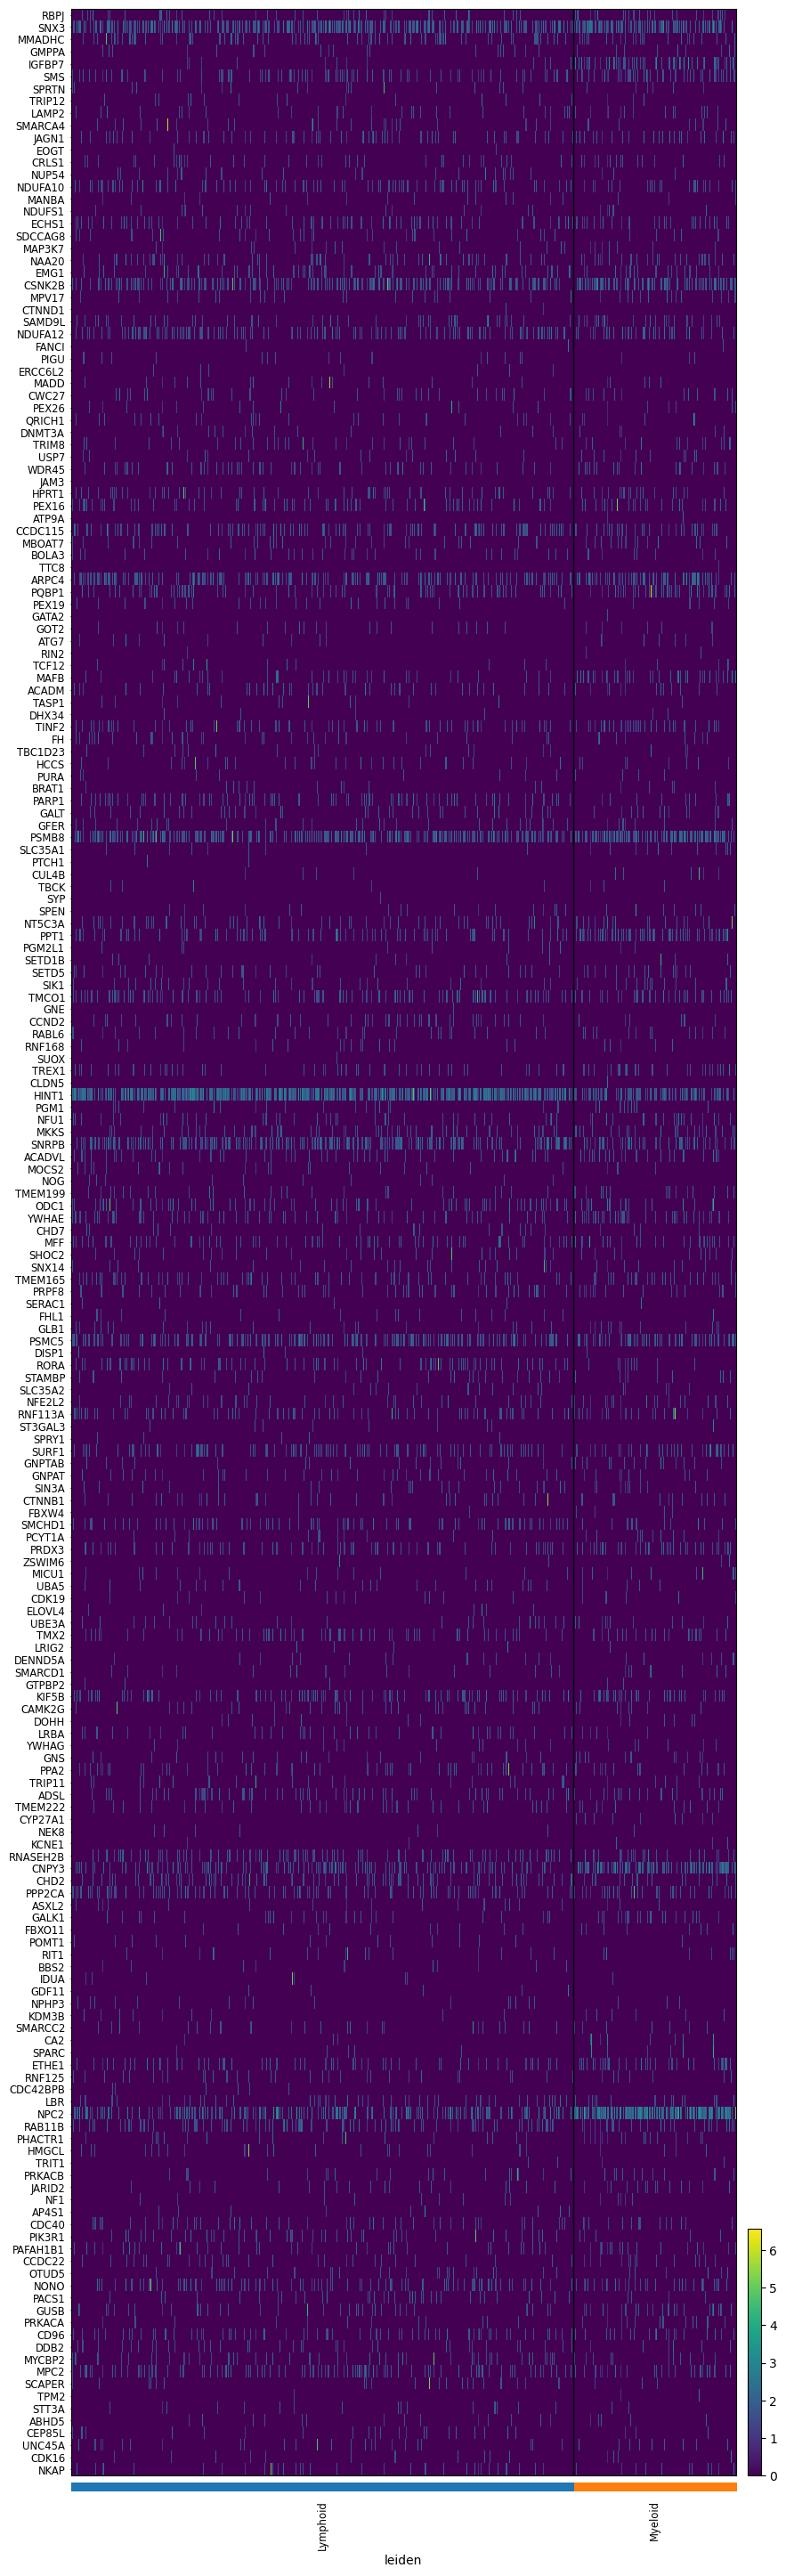

In [10]:
markers = subset_adata.var_names.tolist()
SD = sc.pl.heatmap(subset_adata, markers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Allgenes.pdf")

In [11]:
# Filter rows for Skin
Skin =  DDP.loc[DDP['Skin']==True]
Skin = Skin["gene symbol"]
Skin = list(Skin)

# Filter rows for Nervous
Nervous = DDP.loc[(DDP['Peripheral'] == True) | (DDP['Brain'] == True)]
Nervous = Nervous["gene symbol"]
Nervous = list(Nervous)  

# Filter rows for Musco
Musco = DDP.loc[(DDP['Skeleton'] == True) | (DDP['Musculature'] == True)]
Musco = Musco["gene symbol"]
Musco = list(Musco)  

# Filter rows for Circulatory
Circulatory = DDP.loc[(DDP['Heart'] == True) | (DDP['Bone Marrow'] == True)]
Circulatory = Circulatory["gene symbol"]
Circulatory = list(Circulatory) 

In [12]:
diffgenSkin = list(set(pbmcgen).intersection(Skin))

# Subset 'pbmc' based on the difference between its variable names and 'diffgenCirc'
pbmcSkin = subset_adata[:, diffgenSkin]

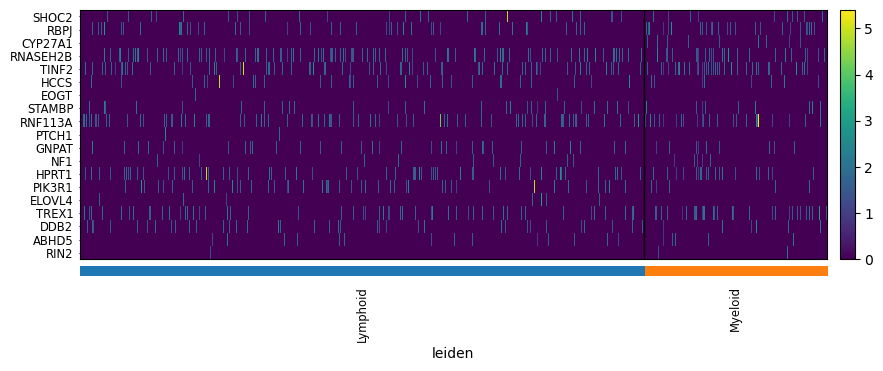

In [13]:
Smarkers = pbmcSkin.var_names.tolist()
SS = sc.pl.heatmap(pbmcSkin, Smarkers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Skin.pdf")

In [14]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [15]:
diffgenNervous = list(set(pbmcgen).intersection(Nervous))

# Subset 'pbmc' based on the difference between its variable names and 'diffgenCirc'
pbmcNervous = subset_adata[:, diffgenNervous]

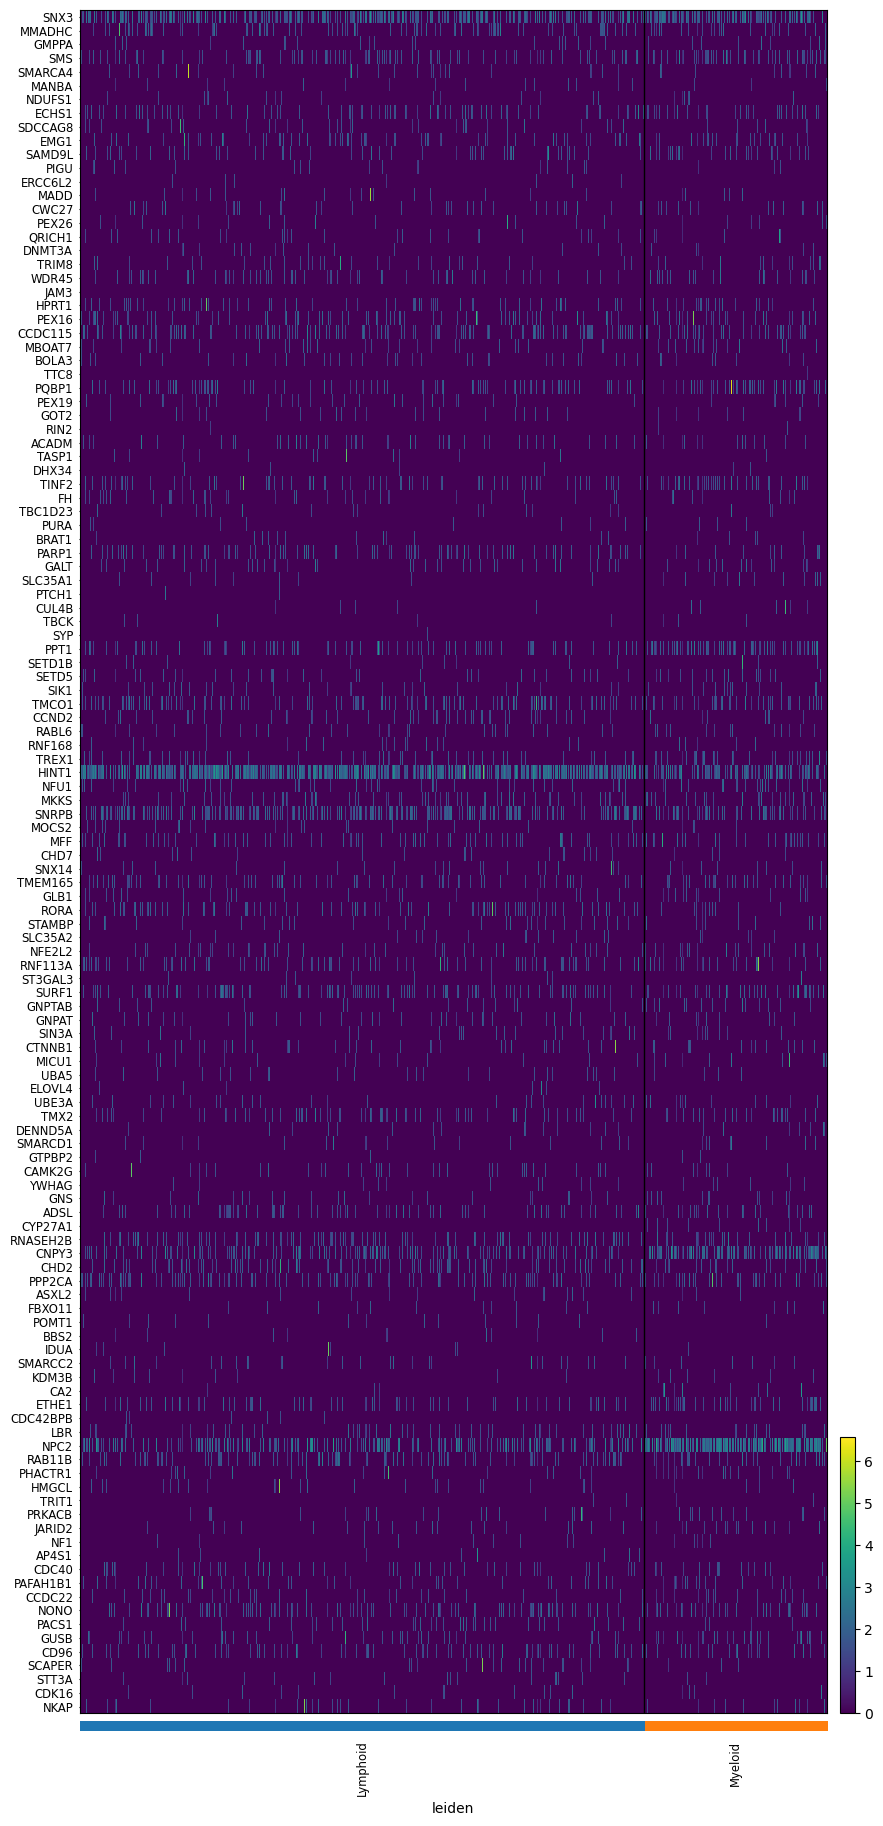

In [16]:
Nmarkers = pbmcNervous.var_names.tolist()
NE = sc.pl.heatmap(pbmcNervous, Nmarkers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Nervous.pdf")

In [17]:
diffgenMusco = list(set(pbmcgen).intersection(Musco))

# Subset 'pbmc' based on the difference between its variable names and 'diffgenCirc'
pbmcMusco = subset_adata[:, diffgenMusco]

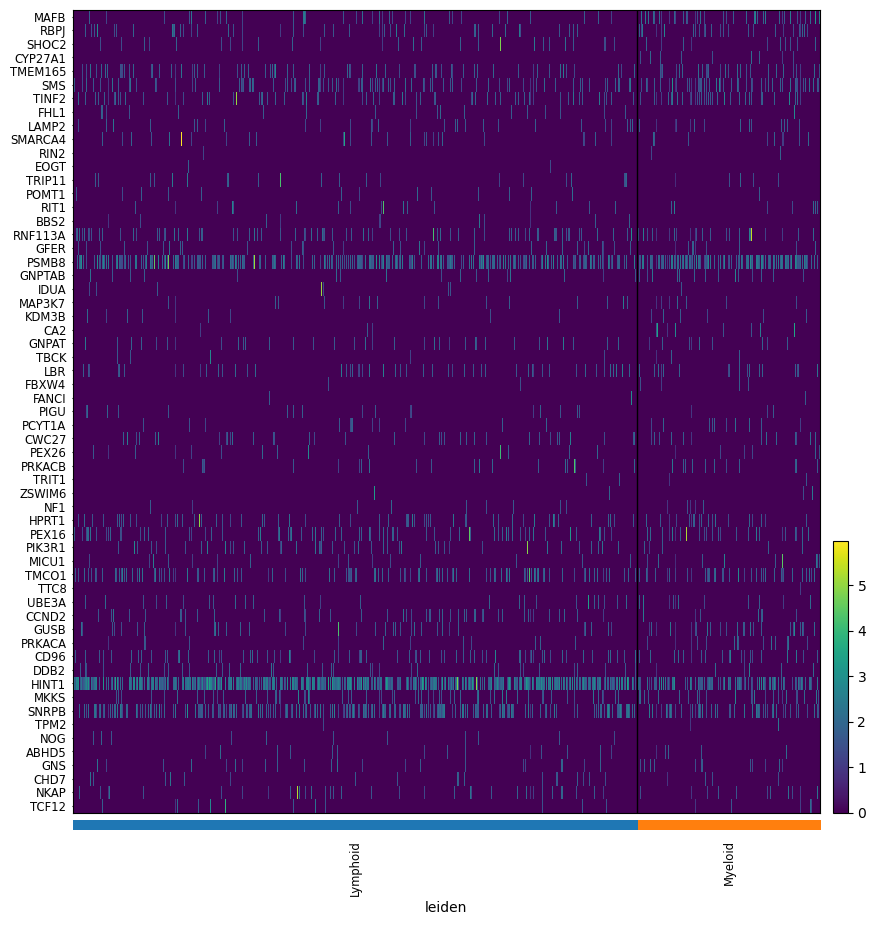

In [18]:
Mmarkers = pbmcMusco.var_names.tolist()
MU = sc.pl.heatmap(pbmcMusco, Mmarkers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Musco.pdf")

In [19]:
diffgenCirc = list(set(pbmcgen).intersection(Circulatory))

# Subset 'pbmc' based on the difference between its variable names and 'diffgenCirc'
pbmcCirc = subset_adata[:, diffgenCirc]

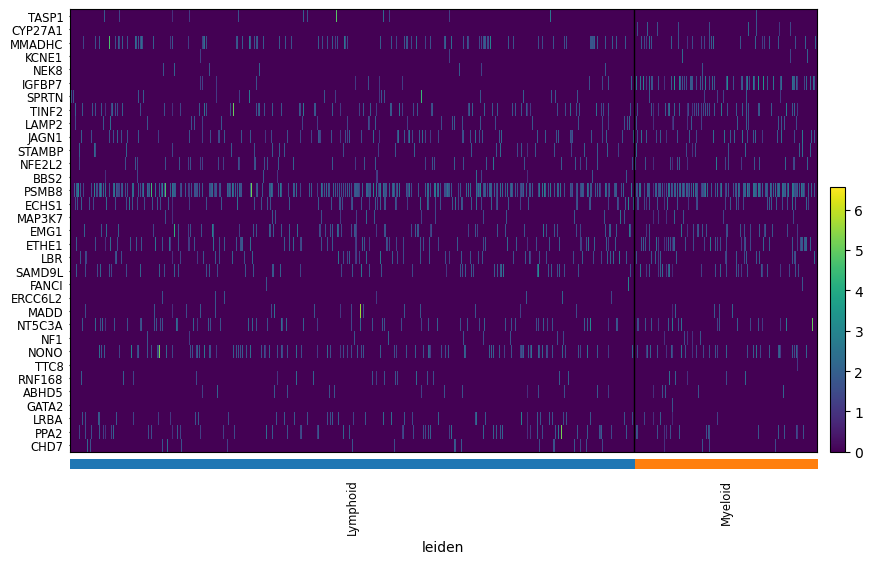

In [20]:
Cmarkers = pbmcCirc.var_names.tolist()
CI = sc.pl.heatmap(pbmcCirc, Cmarkers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Circulatory.pdf")

In [21]:
sc.tl.rank_genes_groups(subset_adata, 'leiden', method='t-test')

In [22]:
subset_adata

AnnData object with n_obs × n_vars = 2638 × 201
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

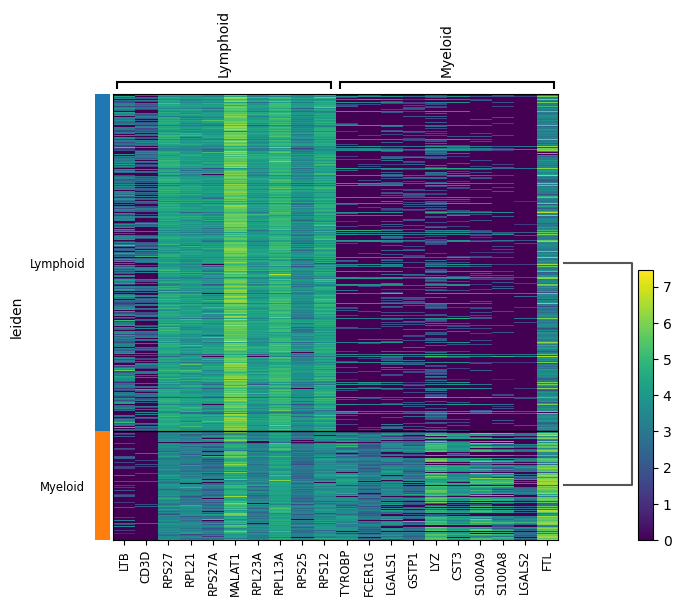

In [23]:
#Exploratory
sc.tl.rank_genes_groups(subset_adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups_heatmap(subset_adata, n_genes=10)


In [24]:
subset_adata

AnnData object with n_obs × n_vars = 2638 × 201
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [25]:
subset_adata.uns['rank_genes_groups']

{'params': {'groupby': 'leiden',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('LTB', 'TYROBP'), ('CD3D', 'FCER1G'), ('RPS27', 'LGALS1'),
            ..., ('LGALS1', 'RPS27'), ('FCER1G', 'CD3D'),
            ('TYROBP', 'LTB')],
           dtype=[('Lymphoid', 'O'), ('Myeloid', 'O')]),
 'scores': rec.array([( 44.404156,  56.29868 ), ( 36.631832,  41.60744 ),
            ( 32.09918 ,  36.58785 ), ..., (-36.58785 , -32.09918 ),
            (-41.60744 , -36.631832), (-56.29868 , -44.404156)],
           dtype=[('Lymphoid', '<f4'), ('Myeloid', '<f4')]),
 'pvals': rec.array([(2.07831277e-282, 0.00000000e+000),
            (4.16787068e-229, 2.66487583e-235),
            (4.26362942e-149, 5.66792520e-192), ...,
            (5.66792520e-192, 4.26362942e-149),
            (2.66487583e-235, 4.16787068e-229),
            (0.00000000e+000, 2.07831277e-282)],
           dtype=[('Lymphoid', '<f8'), ('Myelo

In [26]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


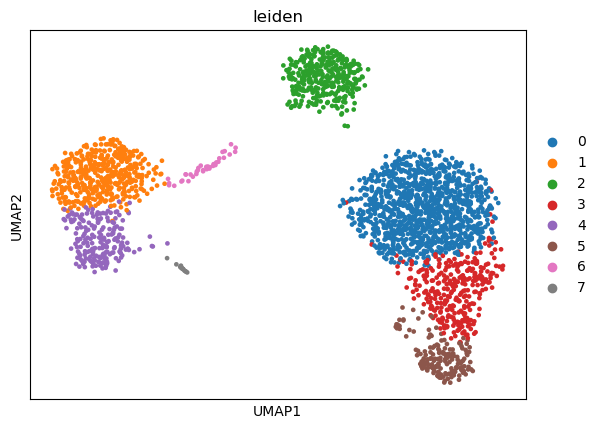

In [27]:
sc.pl.umap(adata, color='leiden')

In [28]:
genes = list(subset_adata.var_names)

In [29]:
adata.X.max()

10.0

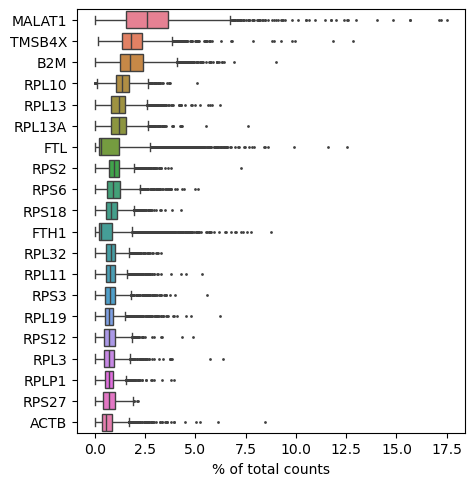

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [30]:
adata2 = sc.read_10x_mtx('data/filtered_gene_bc_matrices/hg19/',var_names='gene_symbols',cache=True)
adata2.var_names_make_unique()
sc.pl.highest_expr_genes(adata2, n_top=20, )
sc.pp.filter_cells(adata2, min_genes=200)
sc.pp.filter_genes(adata2, min_cells=3)
adata2.var['mt'] = adata2.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata2 = adata2[adata2.obs.n_genes_by_counts < 2500, :]
adata2 = adata2[adata2.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)

In [31]:
adata2

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

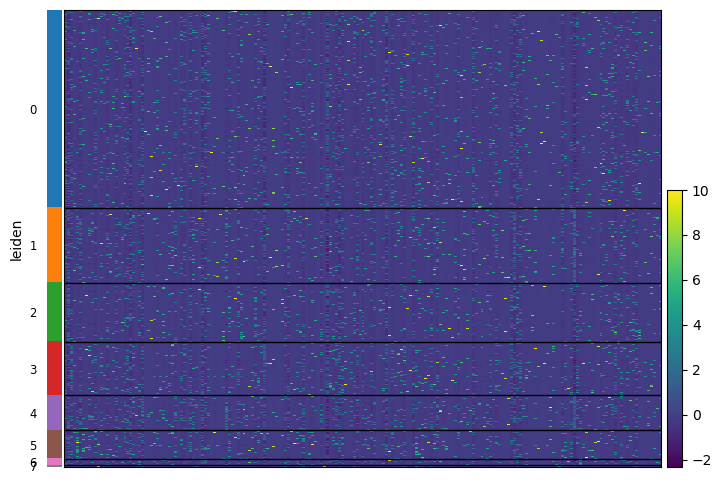

In [32]:
sc.pl.heatmap(adata, groupby='leiden', use_raw=False, var_names=genes)

In [33]:
adata2.obs['leiden'] = adata.obs['leiden'].copy()

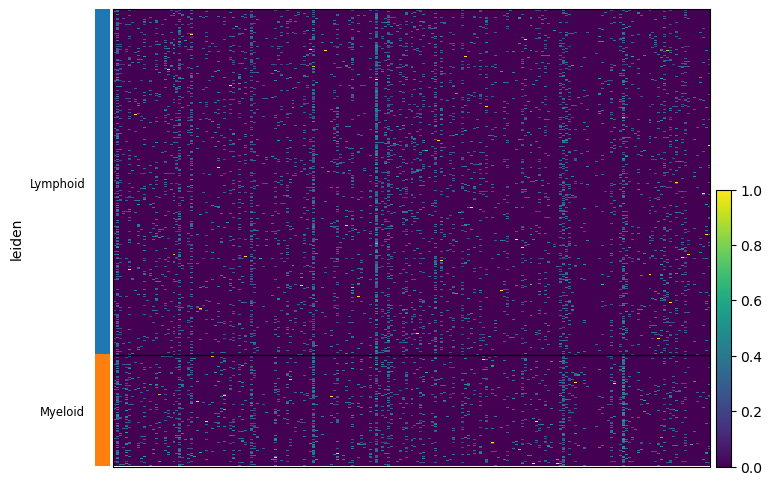

In [49]:
sc.pl.heatmap(adata2, groupby='leiden', use_raw=False, var_names=genes, standard_scale='var')

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


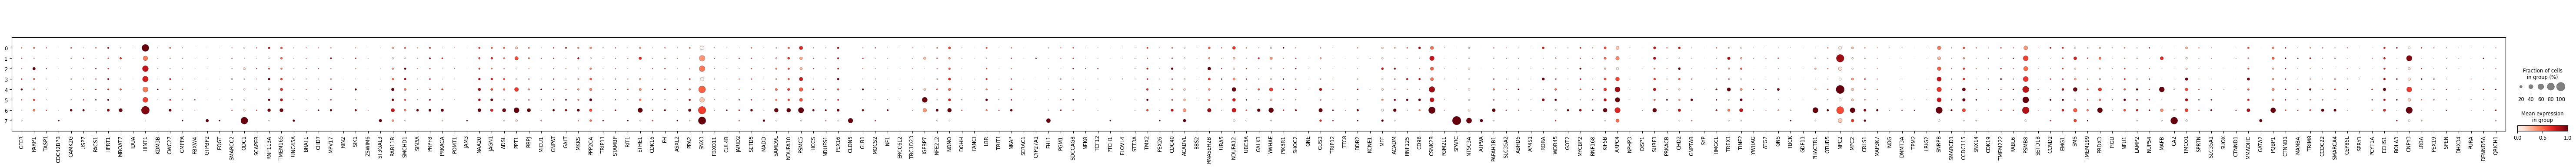

In [97]:
sc.pl.dotplot(adata2, groupby='leiden', use_raw=False, var_names=genes, standard_scale='var')

In [37]:
dict1 = {
    'Muscoskeletal' : Musco,
}
dict2 = {
    'Skin' : Skin,
}
dict3 = {
    'Nervous' : Nervous,
}
dict4 = {
    'Circulatory' : Circulatory
}

In [38]:
dictF = {
    'Muscoskeletal' : [v for v in dict1['Muscoskeletal'] if v in adata.var_names],
    'Skin' : [v for v in dict2['Skin'] if v in adata.var_names],
    'Nervous' : [v for v in dict3['Nervous'] if v in adata.var_names],
    'Circulatory' : [v for v in dict4['Circulatory'] if v in adata.var_names]
}

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


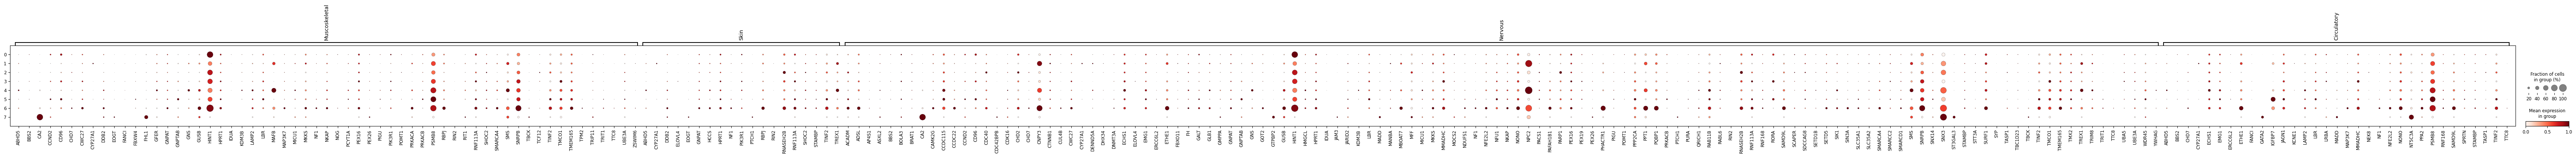

In [125]:
sc.pl.dotplot(adata2, groupby='leiden', use_raw=False, var_names=dictF, standard_scale='var')

In [39]:
new_cluster_names = [
    'Lymphoid', 'Myeloid',
    '2', '3',
    '4', '5',
    '6', '7']
adata2.rename_categories('leiden', new_cluster_names)


adata2.obs['leiden'][adata2.obs['leiden'].isin(['0', '2','3','4'])]='Lymphoid'
adata2.obs['leiden'][adata2.obs['leiden'].isin(['1', '5','6','7'])]='Myeloid'
adata2.obs['leiden']=adata2.obs['leiden'].astype('str').astype('category')
### Reorder and rename the Leiden
adata2.obs['leiden'].cat.rename_categories(np.arange(len(np.unique(adata2.obs['leiden']))).astype('str'))

AAACATACAACCAC-1    0
AAACATTGAGCTAC-1    0
AAACATTGATCAGC-1    0
AAACCGTGCTTCCG-1    0
AAACCGTGTATGCG-1    1
                   ..
TTTCGAACTCTCAT-1    1
TTTCTACTGAGGCA-1    0
TTTCTACTTCCTCG-1    0
TTTGCATGAGAGGC-1    0
TTTGCATGCCTCAC-1    0
Name: leiden, Length: 2638, dtype: category
Categories (2, object): ['0', '1']

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


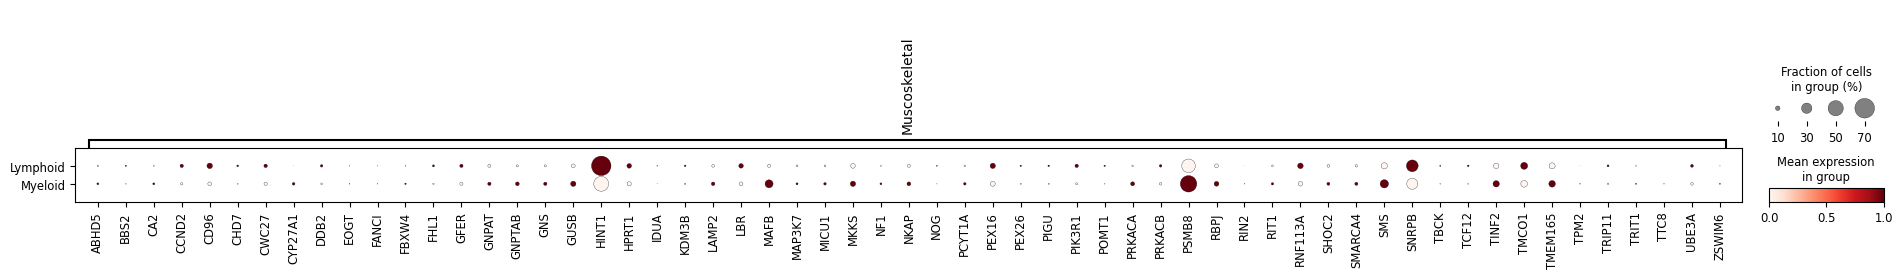

In [40]:
dictM = {
    'Muscoskeletal' : [v for v in dict1['Muscoskeletal'] if v in adata.var_names]
}
sc.pl.dotplot(adata2, groupby='leiden', use_raw=False, var_names=dictM, standard_scale='var', save="MuscDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


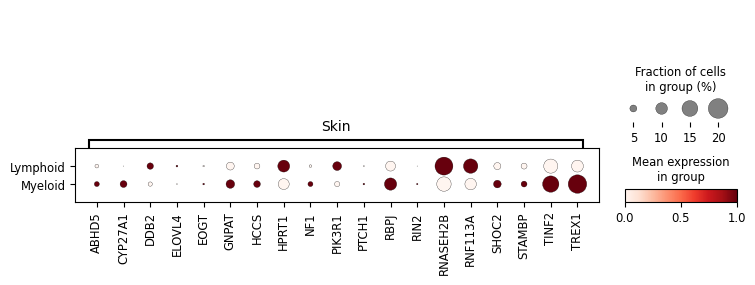

In [41]:
dictS = {
    'Skin' : [v for v in dict2['Skin'] if v in adata.var_names]
}
sc.pl.dotplot(adata2, groupby='leiden', use_raw=False, var_names=dictS, standard_scale='var', save="SkinDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


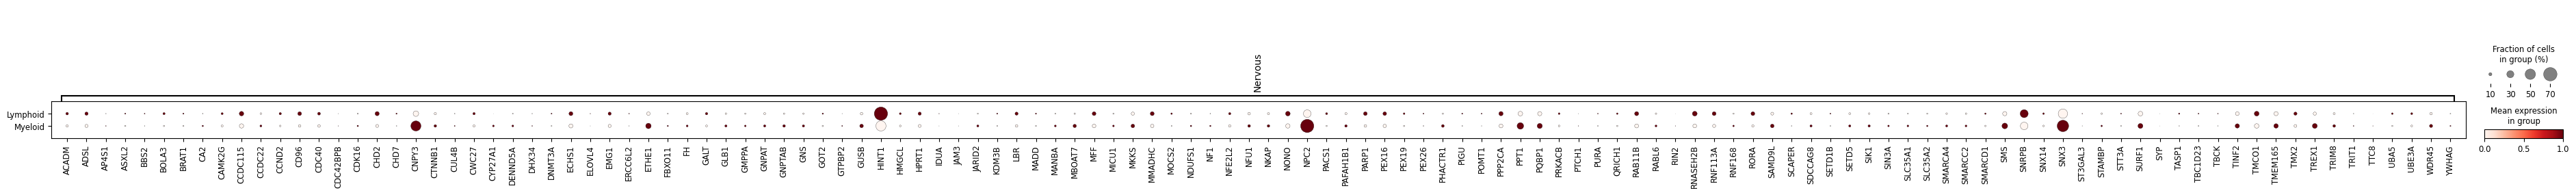

In [42]:
dictN = {
    'Nervous' : [v for v in dict3['Nervous'] if v in adata.var_names]
}
sc.pl.dotplot(adata2, groupby='leiden', use_raw=False, var_names=dictN, standard_scale='var', save="NervousDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


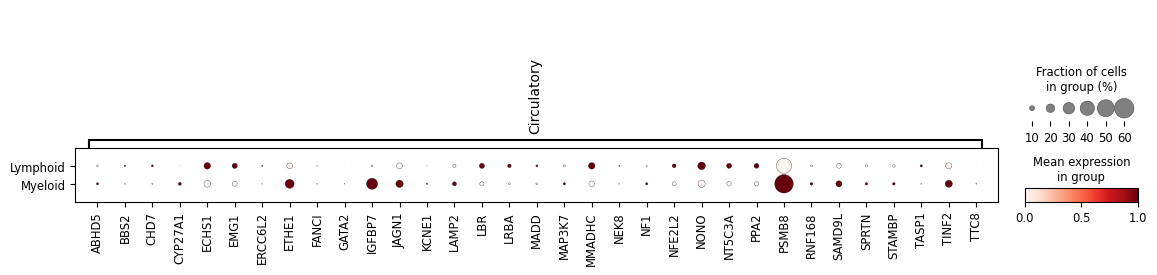

In [43]:
dictC = {
    'Circulatory' : [v for v in dict4['Circulatory'] if v in adata.var_names]
}
sc.pl.dotplot(adata2, groupby='leiden', use_raw=False, var_names=dictC, standard_scale='var', save="CircDOT.pdf")

In [112]:
sc.tl.score_genes(adata, gene_list, ctrl_size=50, gene_pool=None, n_bins=25, score_name='disease_spatial_score_x', random_state=0, copy=False, use_raw=None)

ValueError: No valid genes were passed for scoring.

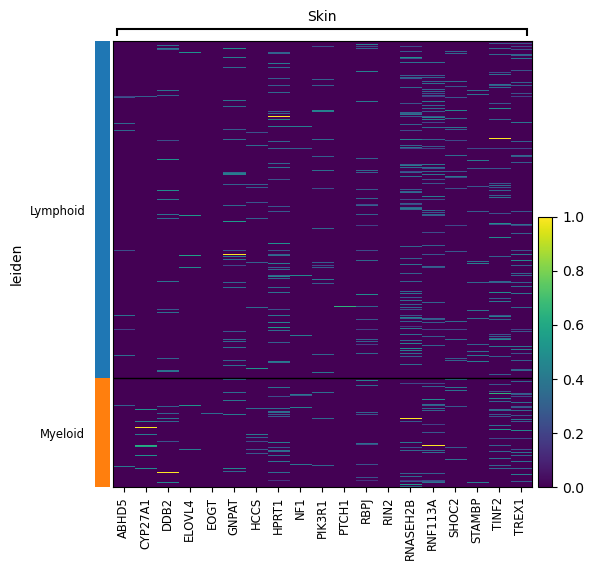

In [50]:
sc.pl.heatmap(adata2, groupby='leiden', use_raw=False, var_names=dictS, standard_scale='var', show_gene_labels=True)

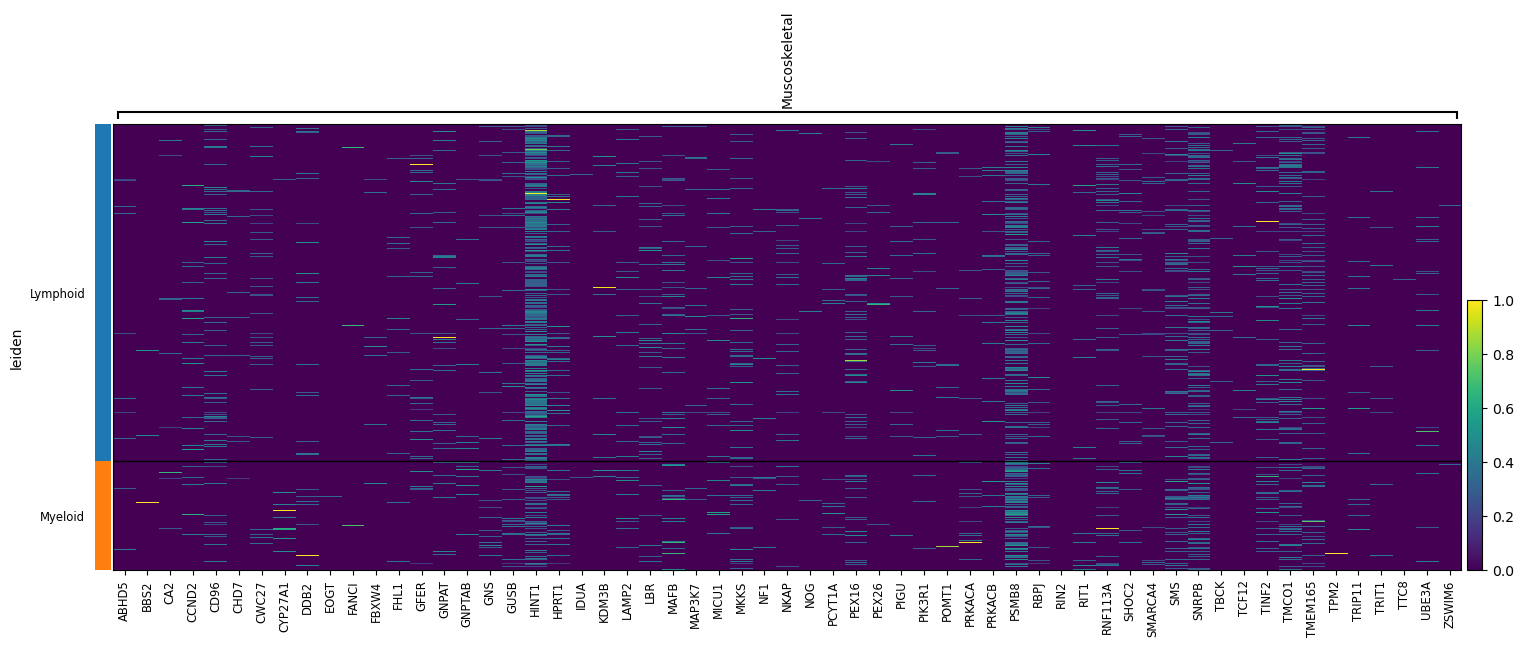

In [46]:
sc.pl.heatmap(adata2, groupby='leiden', use_raw=False, var_names=dictM, standard_scale='var', show_gene_labels=True)

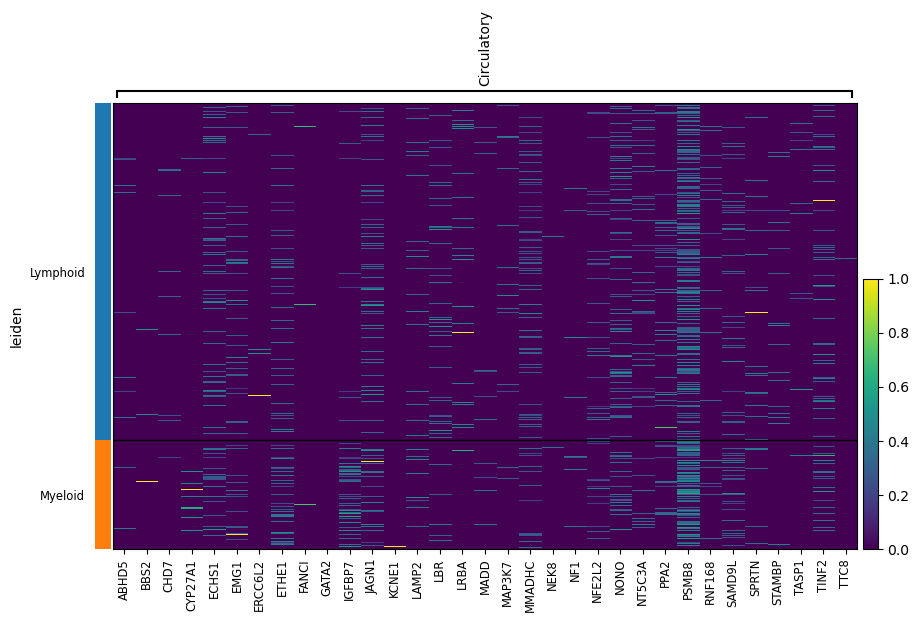

In [47]:
sc.pl.heatmap(adata2, groupby='leiden', use_raw=False, var_names=dictC, standard_scale='var', show_gene_labels=True)

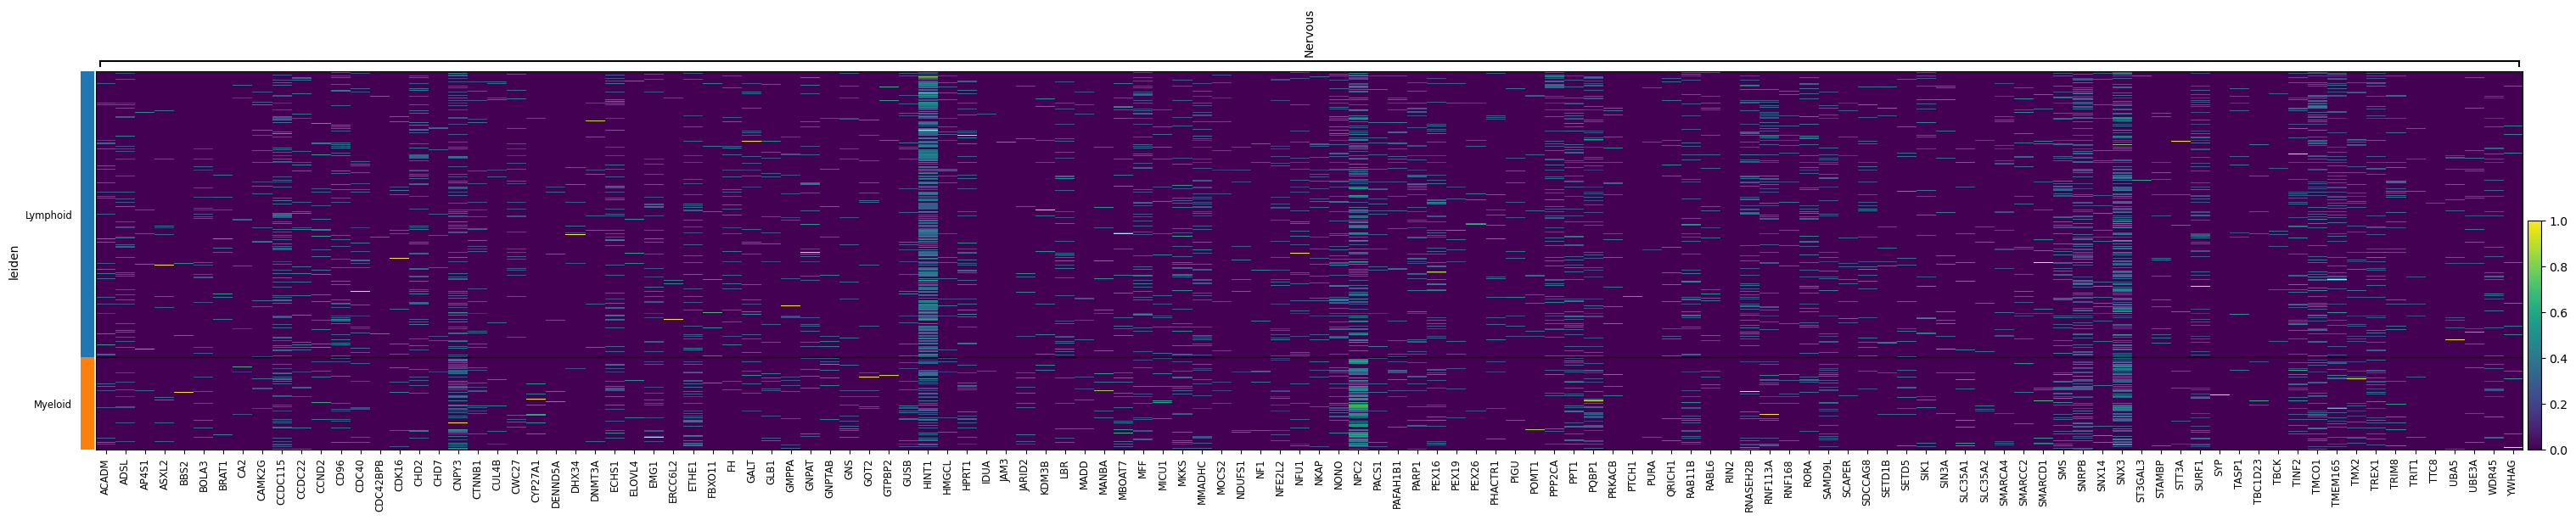

In [48]:
sc.pl.heatmap(adata2, groupby='leiden', use_raw=False, var_names=dictN, standard_scale='var', show_gene_labels=True)

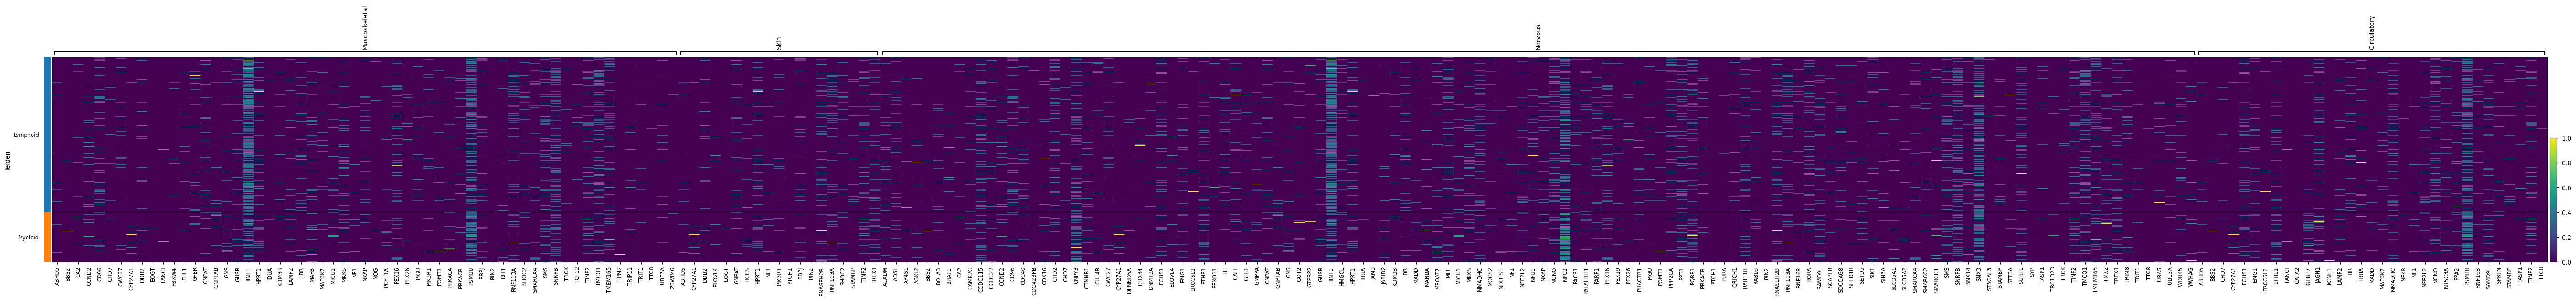

In [54]:
sc.pl.heatmap(adata2, groupby='leiden', use_raw=False, var_names=dictF, standard_scale='var',show_gene_labels=True)